In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip


--2023-09-10 15:36:43--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.217.207, 173.194.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   232MB/s    in 0.8s    

2023-09-10 15:36:44 (232 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-09-10 15:36:44--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.217.207, 173.194.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-

In [ ]:

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [ ]:
base_dir = './tmp/rps-train/rps'

rock_dir = os.path.join(base_dir,"rock")
paper_dir = os.path.join(base_dir,"paper")
scissors_dir = os.path.join(base_dir,"scissors")

print(f"total training rock images : {len(os.listdir(rock_dir))}")
print(f"total training paper images : {len(os.listdir(paper_dir))}")
print(f"total training scissors images : {len(os.listdir(scissors_dir))}")


total training rock images : 840
total training paper images : 840
total training scissors images : 840


In [ ]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
# Prepare the ImageDataGenerator

TRAINING_DIR = "./tmp/rps-train/rps"
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
VALIDATION_DIR = "./tmp/rps-test/rps-test-set"

valid_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150))

valid_generator = valid_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (150,150))


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = 20,
                    epochs = 20)

Epoch 1/20
20/20 [==============================] - 71s 3s/step - loss: 1.1512 - accuracy: 0.3500 - val_loss: 1.0916 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 61s 3s/step - loss: 1.1007 - accuracy: 0.3513 - val_loss: 1.0844 - val_accuracy: 0.4462
Epoch 3/20
20/20 [==============================] - 60s 3s/step - loss: 1.0976 - accuracy: 0.3750 - val_loss: 1.0520 - val_accuracy: 0.6022
Epoch 4/20
20/20 [==============================] - 61s 3s/step - loss: 1.0342 - accuracy: 0.5094 - val_loss: 0.8108 - val_accuracy: 0.6801
Epoch 5/20
20/20 [==============================] - 63s 3s/step - loss: 0.9221 - accuracy: 0.5328 - val_loss: 0.9531 - val_accuracy: 0.5753
Epoch 6/20
20/20 [==============================] - 61s 3s/step - loss: 0.8507 - accuracy: 0.5969 - val_loss: 0.6638 - val_accuracy: 0.6183
Epoch 7/20
20/20 [==============================] - 61s 3s/step - loss: 0.8093 - accuracy: 0.6078 - val_loss: 0.4572 - val_accuracy: 0.9140
Epoch 8/20
20/20 [==

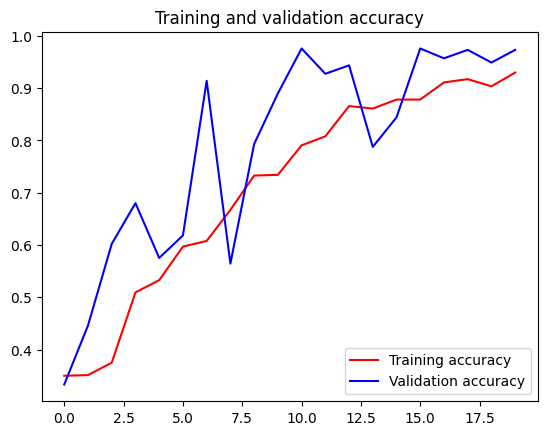

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()